In [53]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error as mse

<h2>Load Data</h2>
Firstly let us get the data imported and take a look at a few observations

In [ ]:
df = pd.read_csv('TFP.csv')
df.columns

head of the data (the first 5 rows)

In [72]:
df.head(5)

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179


In [57]:
df["isocode"].unique()

array(['USA', 'CAN', 'MEX'], dtype=object)

In [55]:
df.shape

(186, 3)

<h2>Data Visualisation</h2>

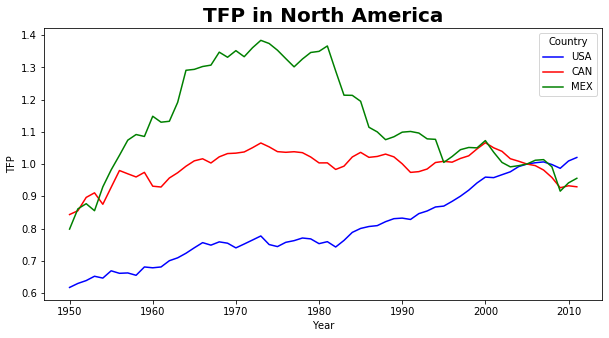

In [58]:
fig = plt.figure(figsize=(10.0, 5.0))
sns.lineplot(x = "year", y = "rtfpna", hue="isocode", data=df, palette = ['blue', 'red', 'green'])
plt.ylabel("TFP")
plt.xlabel("Year")
plt.legend(title = 'Country', labels=['USA', 'CAN', 'MEX'])
plt.title('TFP in North America', size = 20, weight='semibold')
plt.show()

In [59]:
df_usa = df[df['isocode'] == 'USA'].drop(columns= ['isocode']).set_index('year')   
df_can = df[df['isocode'] == 'CAN'].drop(columns= ['isocode']).set_index('year')
df_mex = df[df['isocode'] == 'MEX'].drop(columns= ['isocode']).set_index('year')

 <b>Model USA</a>

In [60]:
df_usa.shape

(62, 1)

In [61]:
train = df_usa[:52]
test = df_usa[52:]
train.shape , test.shape 

((52, 1), (10, 1))

In [62]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
model = auto_arima(train['rtfpna'], suppress_warnings=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 155.226
Date:                Thu, 17 Dec 2020   AIC                           -306.452
Time:                        22:06:31   BIC                           -302.588
Sample:                             0   HQIC                          -304.976
                                 - 52                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0067      0.002      3.668      0.000       0.003       0.010
sigma2         0.0001   2.98e-05      4.470      0.000    7.47e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.90   Prob(JB):                         0.16
Heteroskedasticity (H):               0.57   Skew:                            -0.65
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
prediction = pd.DataFrame(model.predict(n_periods=10), index=test.index)
prediction.columns = ['rtfpna']
prediction
rmse = mse(test, prediction)**0.5
print(rmse)

0.011981737914080467


In [70]:
model_forecast = auto_arima(df_usa['rtfpna'], suppress_warnings=True)
model_forecast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 187.087
Date:                Thu, 17 Dec 2020   AIC                           -370.173
Time:                        22:06:10   BIC                           -365.951
Sample:                             0   HQIC                          -368.519
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0066      0.002      4.116      0.000       0.003       0.010
sigma2         0.0001   2.58e-05      4.928      0.000    7.64e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.89
Prob(Q):                              0.80   Prob(JB):                         0.14
Heteroskedasticity (H):               0.73   Skew:                            -0.62
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
forecast = pd.DataFrame(model_forecast.predict(n_periods=10), index=test.index+10)
forecast.columns = ['rtfpna']
forecast


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 187.087
Date:                Thu, 17 Dec 2020   AIC                           -370.173
Time:                        22:06:01   BIC                           -365.951
Sample:                             0   HQIC                          -368.519
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0066      0.002      4.116      0.000       0.003       0.010
sigma2         0.0001   2.58e-05      4.928      0.000    7.64e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.89
Prob(Q):                              0.80   Prob(JB):                         0.14
Heteroskedasticity (H):               0.73   Skew:                            -0.62
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

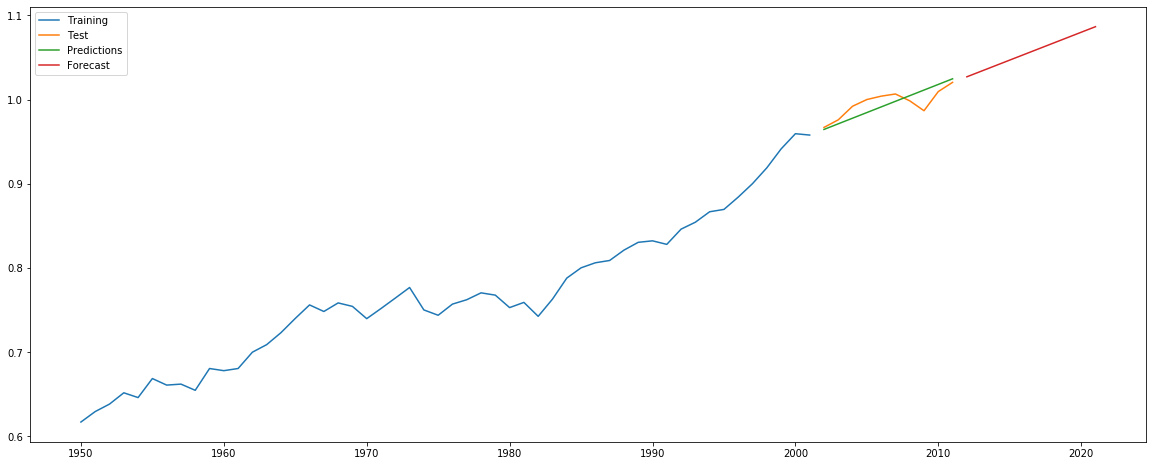

In [67]:
plt.figure(figsize=(20,8))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.plot(forecast, label = 'Forecast')
plt.legend();

<h2>The other models are the same</h2>


A good feature to forecast is <b>rgdpna</b> because is correlation with <b>rtfpna</b>